# Step 1: Import Libraries
We begin by importing the necessary Python libraries for data analysis, visualization, and machine learning preprocessing:

pandas and numpy are used for data manipulation and numerical operations.
matplotlib.pyplot and seaborn are used for visualizing the data, such as bar charts and heatmaps.
StandardScaler from sklearn.preprocessing is used to scale the features for distance-based algorithms like KNN.
train_test_split from sklearn.model_selection is used to divide the dataset into training and testing sets.
These libraries provide the core functionality required to explore, prepare, and evaluate our machine learning models.

In [151]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 2: Load the Dataset
We load the dataset and preview the first few rows to understand its structure.


In [154]:
# Step 2: Load the Dataset
df = pd.read_csv('train.xlsx.csv')  #  
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Step 3: Dataset Overview
We explore the dataset using `.info()`, `.describe()`, and check for missing values.


In [157]:
# Step 3: Overview
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Step 3: Check for Duplicate Rows

We check if any rows are completely duplicated. Duplicate rows can introduce bias and redundancy, so it's important to remove them early in the process.


In [160]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


### Result:

No duplicate rows found  
The dataset is clean in terms of duplication.


## Step 4: Check for Zero Values in Important Features

Some features in the dataset may contain zero values that are not logically valid — such as `px_height`, `sc_w`, `fc`, and `pc`. These may represent missing or incorrectly entered data.

We will count how many zero values exist per column to identify where data cleaning is needed.


In [164]:
# Count zero values in all columns
zero_counts = (df == 0).sum()
zero_counts = zero_counts[zero_counts > 0].sort_values(ascending=False)

print("Columns with zero values:")
print(zero_counts)


Columns with zero values:
blue            1010
touch_screen     994
wifi             986
dual_sim         981
four_g           957
price_range      500
three_g          477
fc               474
sc_w             180
pc               101
px_height          2
dtype: int64


### Zero Value Summary

The following columns contain zero values:

- `blue`: 1010 → Likely valid (0 = no Bluetooth)
- `touch_screen`: 994 → Likely valid (0 = not a touchscreen device)
- `wifi`: 986 → Likely valid (0 = does not support WiFi)
- `dual_sim`: 981 → Likely valid (0 = only one SIM slot)
- `four_g`: 957 → Likely valid (0 = no 4G support)
- `price_range`: 500 → Valid class label (0 = low price)
- `three_g`: 477 → Likely valid (0 = no 3G)
- `fc`: 474 → May be valid (0 = no front camera)
- `sc_w`: 180 → Potentially invalid (0 screen width is unlikely)
- `pc`: 101 → Likely valid (0 = no main camera)
- `px_height`: 2 → Invalid (screen height cannot be 0) 

We will clean `px_height` and `sc_w` by replacing zero values with their respective column medians. Other columns will be kept as-is, since zero likely represents valid absence of a feature.


## Step 6: Handle Invalid Zero Values in `sc_w`

The `sc_w` (screen width) column contains 180 zero values, which are not realistic.  
We will replace these zeros with the **median** of all non-zero values in the same column.


In [168]:
# Calculate median of non-zero screen width values
median_sc_w = df[df["sc_w"] != 0]["sc_w"].median()

# Replace 0s with median
df["sc_w"] = df["sc_w"].replace(0, median_sc_w)

# Verify that no zeros remain
print("Remaining zeros in sc_w:", (df["sc_w"] == 0).sum())


Remaining zeros in sc_w: 0


### Result:

- 180 zero values in `sc_w` were successfully replaced with the median value.  
- This improves the data quality for screen width, which is important for models that rely on display features.


## Step 7: Feature Correlation

We generate a correlation heatmap to visualize how features relate to each other and to the target variable (`price_range`).  
Highly correlated features can be redundant and may impact certain models negatively.


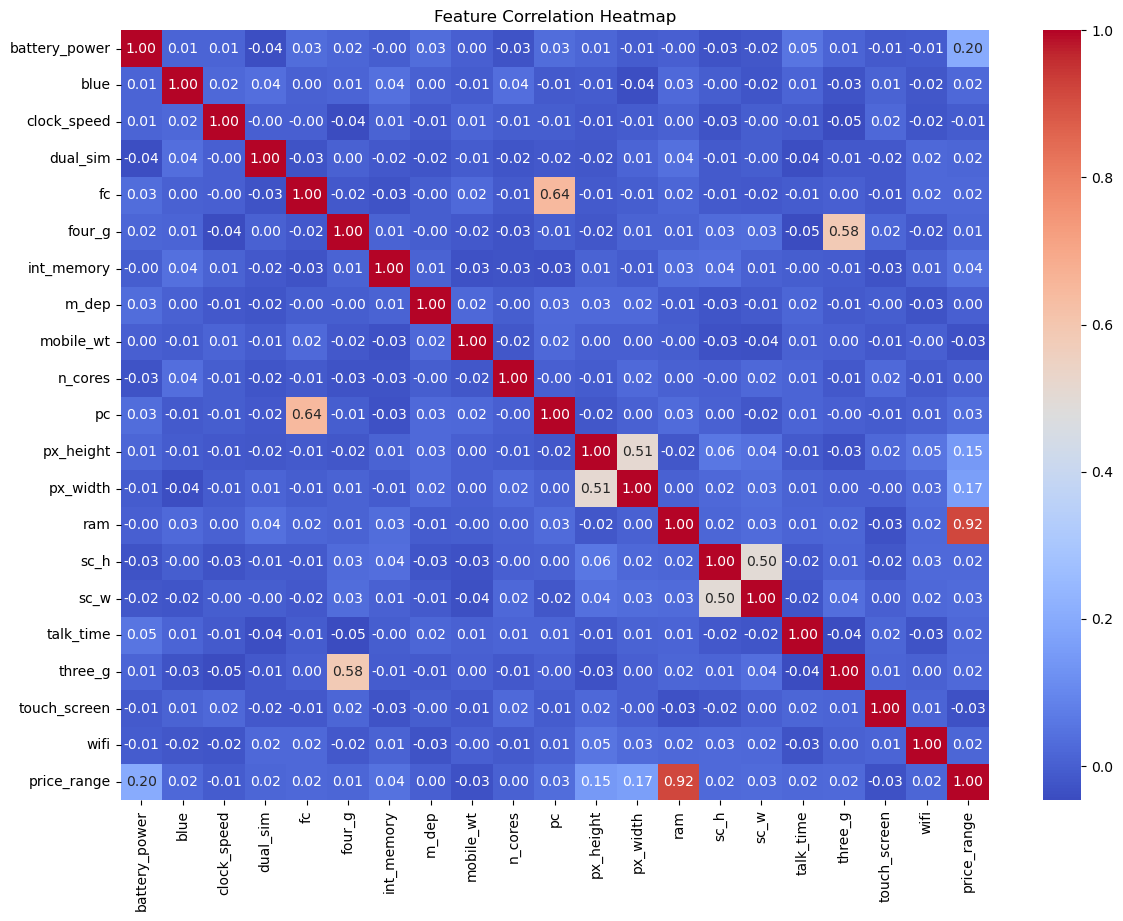

In [172]:
 
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## Step 8: Outlier Detection  

We use boxplots to visually inspect numerical features for potential outliers.  
This is especially helpful for models sensitive to scale and extreme values, like K-Nearest Neighbors.

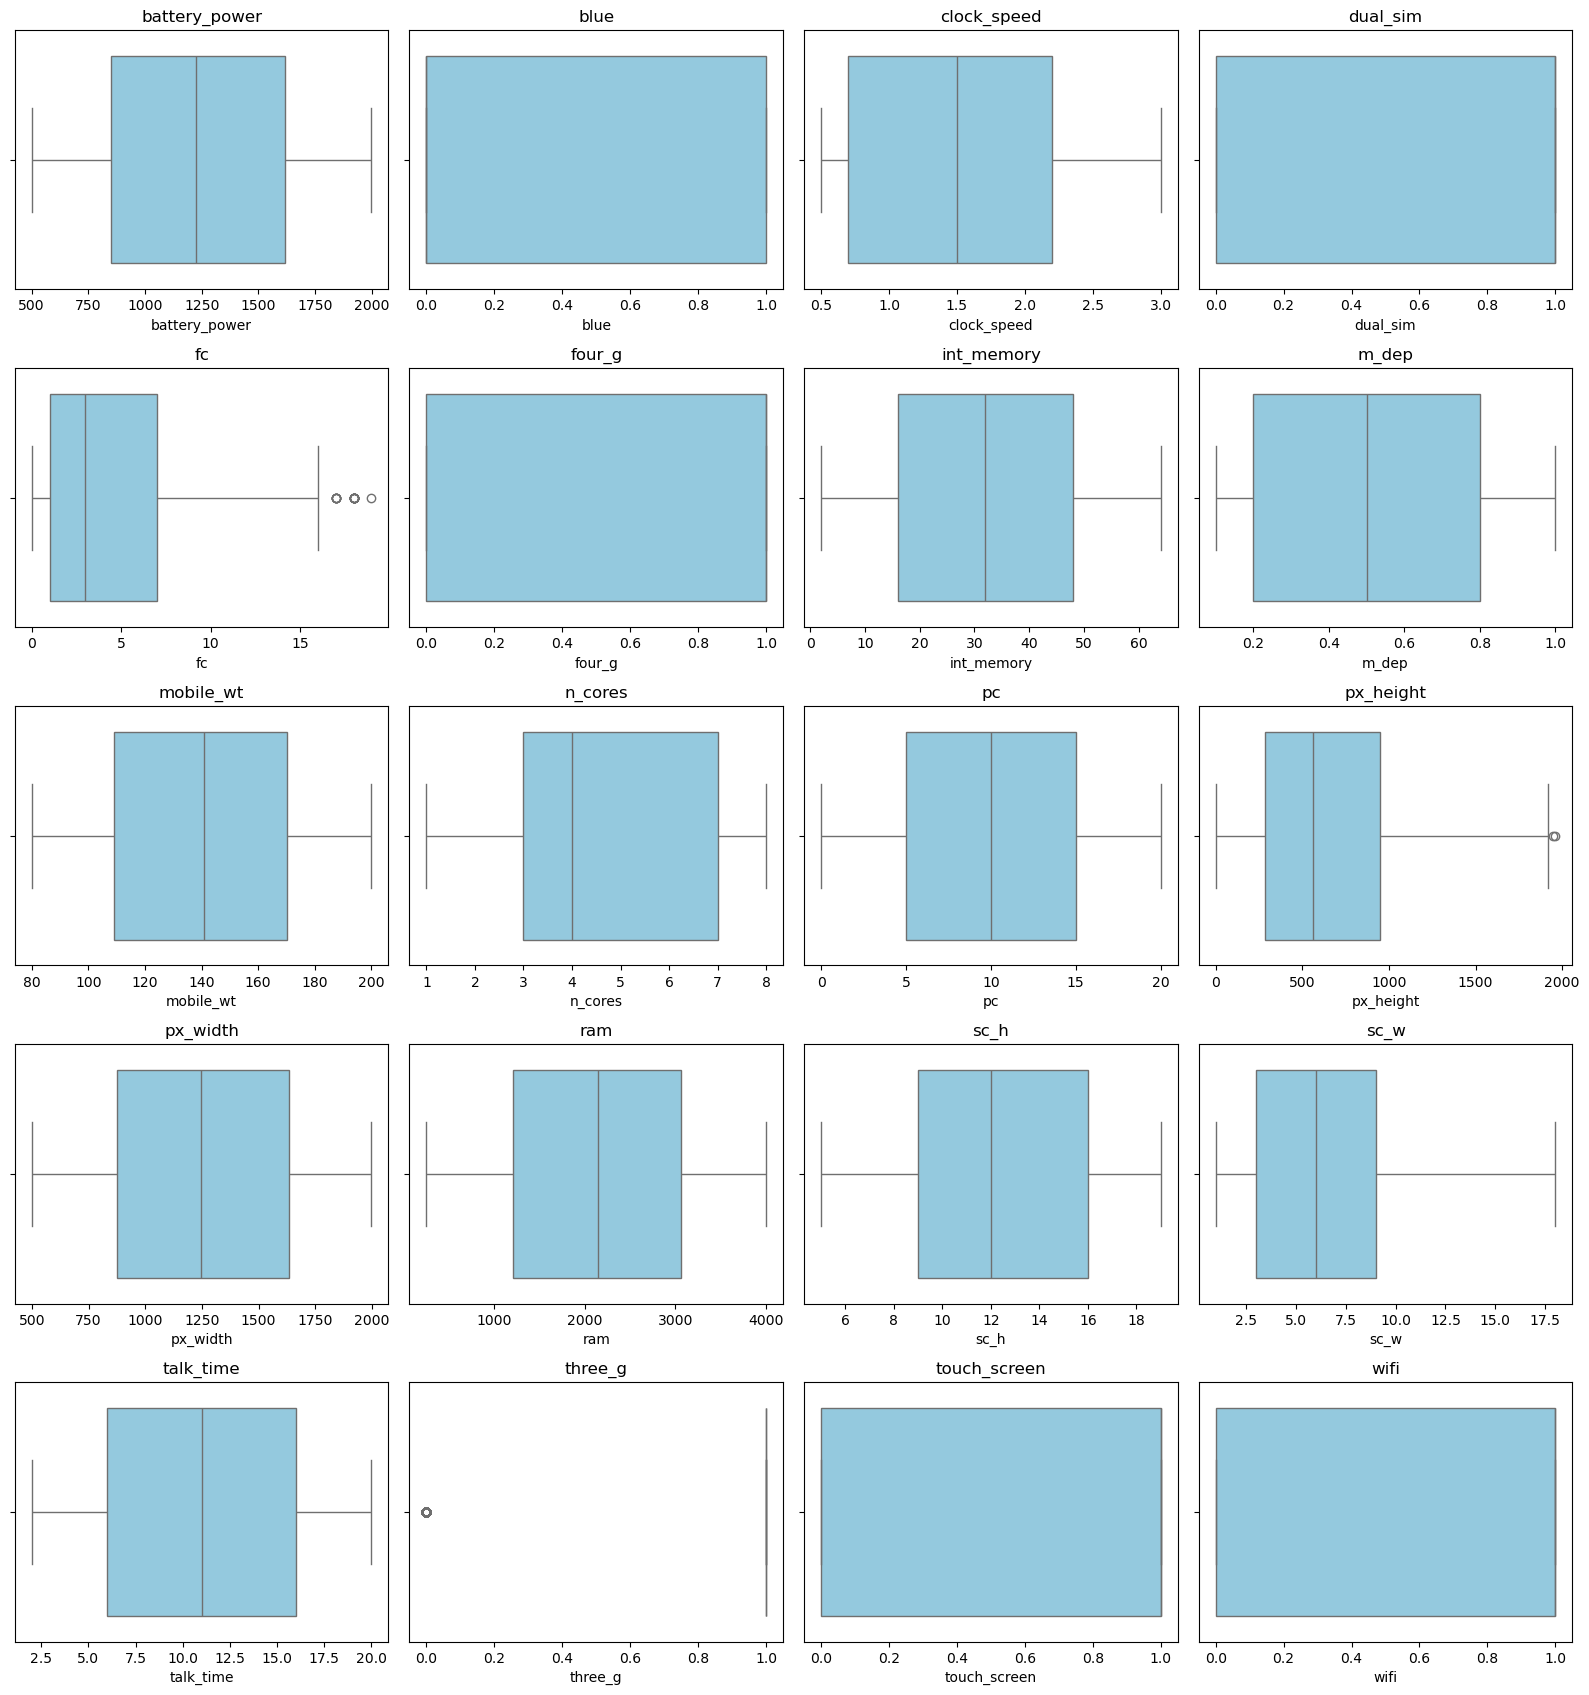

In [174]:
# Select numerical features (excluding the target)
numerical_features = df.drop('price_range', axis=1)

# Plot boxplots for each feature
plt.figure(figsize=(16, 20))

for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(column)
    plt.tight_layout()
plt.show() 

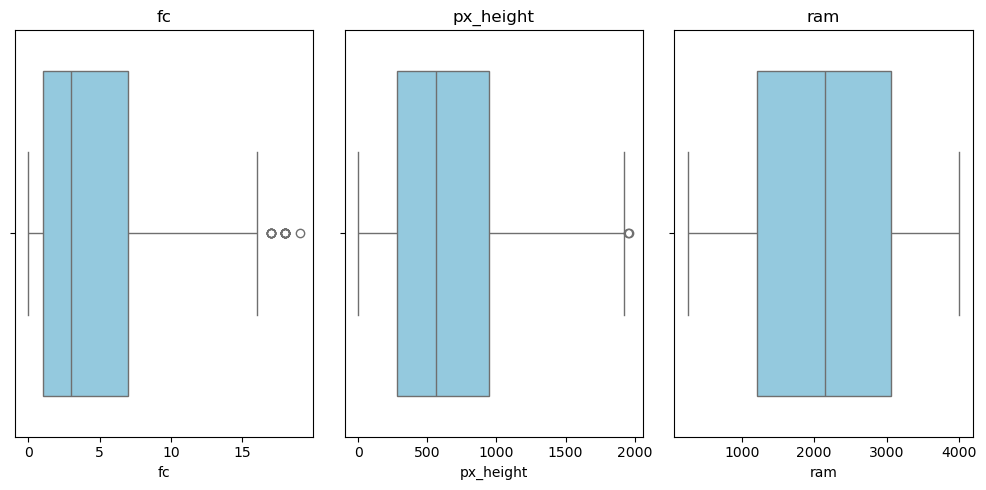

In [175]:
# Plot selected columns only
selected = ['fc', 'px_height', 'ram']
plt.figure(figsize=(10, 5))
for i, col in enumerate(selected, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


## Outlier Detection Summary

Boxplots were generated for all numerical features to visually inspect the presence of outliers.

The following observations were made:

- `battery_power`, `clock_speed`, `int_memory`, `mobile_wt`, `ram`, and `talk_time` appear well distributed with no major outliers.
- `fc` (front camera megapixels) contains a few higher-end outlier values.
- `px_height` includes one or two values on the far right that could be considered outliers.
- `three_g` shows a low-end value that appears separate from the rest.


## Step 9: Visualize Class Distribution

We analyze the distribution of the target variable `price_range`, which represents mobile phone price categories:

- 0 → Low cost
- 1 → Medium low
- 2 → Medium high
- 3 → High cost

This helps us verify whether the dataset is balanced, which is important for training unbiased classification models.


C:\Users\User\AppData\Local\Temp\ipykernel_6148\519408839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='Set2')


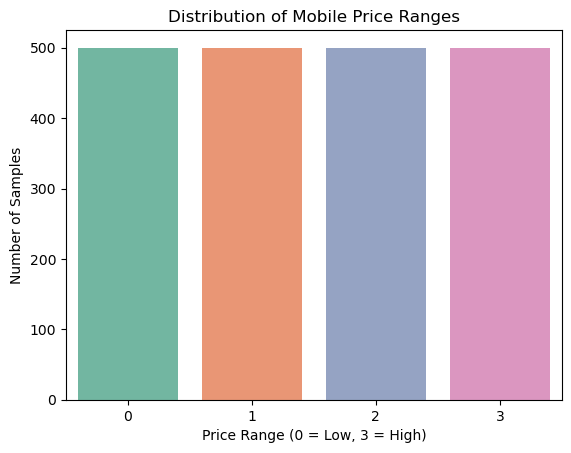

In [179]:
# Plot class distribution
sns.countplot(x='price_range', data=df, palette='Set2')
plt.title('Distribution of Mobile Price Ranges')
plt.xlabel('Price Range (0 = Low, 3 = High)')
plt.ylabel('Number of Samples')
plt.show()


### Observations:

The target variable `price_range` is evenly distributed:

- Class 0: 500 samples
- Class 1: 500 samples
- Class 2: 500 samples
- Class 3: 500 samples

 The dataset is perfectly balanced.  
This allows us to use standard classification metrics (like accuracy, F1-score) without special handling.


## Step 10: Feature Scaling and Train-Test Split

We apply `StandardScaler` to normalize the input features.  
This is especially important for algorithms like K-Nearest Neighbors, which are sensitive to the scale of feature values.

Then, we split the dataset into training and testing sets using an 80/20 split.  
We use `stratify=y` to ensure that the distribution of the target variable (`price_range`) remains consistent in both sets.


In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1600, 20)
Testing set shape: (400, 20)


### Result:

- Training set contains 1600 samples
- Testing set contains 400 samples
- Feature scaling was applied to all input features successfully


## Step 11: Model 1 – Decision Tree Classifier

We train a `DecisionTreeClassifier` on the training data and evaluate its performance using:

- Accuracy score
- Classification report (precision, recall, f1-score)
- Confusion matrix


### Step 11.1: Train the Decision Tree Classifier

We initialize a `DecisionTreeClassifier` and train it on the training data.


In [186]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Step 11.2: Evaluate the Decision Tree Model

We use the test set to evaluate the model's performance  


Decision Tree Accuracy: 0.8225

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       100
           1       0.79      0.74      0.76       100
           2       0.75      0.77      0.76       100
           3       0.89      0.86      0.87       100

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400


Confusion Matrix:
[[92  8  0  0]
 [14 74 12  0]
 [ 0 12 77 11]
 [ 0  0 14 86]]


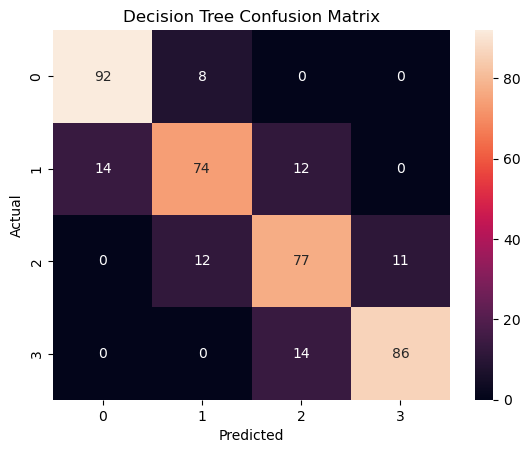

In [191]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot
sns.heatmap(cm, annot=True)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 12: Model 2 – K-Nearest Neighbors (KNN)

### Step 12.1: Train the K-Nearest Neighbors Model

We initialize a KNN model with \( k = 5 \), which means the prediction will be based on the 5 nearest neighbors.  
Since KNN is sensitive to feature scale, we already applied `StandardScaler` during preprocessing.


In [197]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

### Step 12.2: Evaluate the KNN Model

We use the test set to evaluate model performance using:
- Accuracy score
- Classification report
- Confusion matrix


KNN Accuracy: 0.525

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       100
           1       0.39      0.42      0.40       100
           2       0.41      0.46      0.44       100
           3       0.71      0.51      0.59       100

    accuracy                           0.53       400
   macro avg       0.54      0.52      0.53       400
weighted avg       0.54      0.53      0.53       400


Confusion Matrix:
[[71 25  4  0]
 [33 42 19  6]
 [ 4 35 46 15]
 [ 0  7 42 51]]


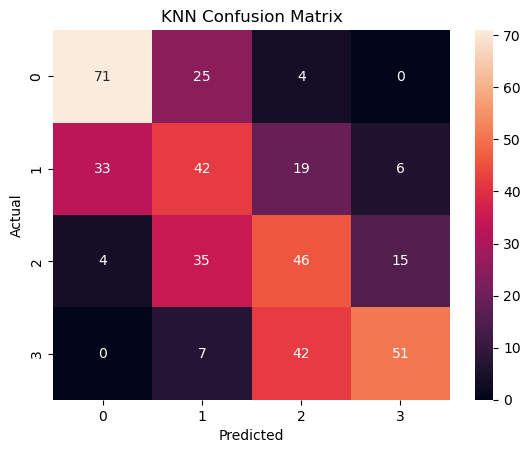

In [200]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot
sns.heatmap(cm, annot=True)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 13: Conclusion and Model Comparison

In this project, we applied two classification algorithms to the Mobile Price Classification dataset:

### 1. Decision Tree Classifier
- **Accuracy:** ~82.25%
- Performed well across all classes
- Easy to interpret and handles non-linear relationships
- Less affected by outliers or scaling

### 2. K-Nearest Neighbors (KNN)
- Accuracy was lower compared to Decision Tree
- More sensitive to overlapping features and outliers
- Performance may improve with tuning (e.g., different values of K)

### Final Thoughts:
- The **Decision Tree classifier** outperformed KNN in both accuracy and class-wise consistency.
- Future improvements could include:
  - Hyperparameter tuning (e.g., grid search for depth, neighbors)
  - Trying ensemble models like **Random Forest** or **Gradient Boosting**
  - Applying feature selection or PCA to reduce noise

 Overall, the Decision Tree was the most suitable model for this dataset.
